In [1]:
#Import the required lybraries
import pandas as pd
import matplotlib.pyplot as plt
import requests
from math import floor
from termcolor import colored as cl
import seaborn as sb
import numpy as np
import fundamentalanalysis as fa
import yfinance as yf

In [2]:
plt.rcParams['figure.figsize'] = (20, 10)
plt.style.use('fivethirtyeight')

In [3]:
def get_historical_data(symbol):
    
    # Request historic pricing data via finance.yahoo.com API
    df = yf.Ticker(symbol).history(period='1y')[['Close', 'Open', 'High', 'Volume']]
    return df

In [4]:
def get_macd(price, slow, fast, smooth):
    exp1 = price.ewm(span = fast, adjust = False).mean()
    exp2 = price.ewm(span = slow, adjust = False).mean()
    macd = pd.DataFrame(exp1 - exp2).rename(columns = {'Close':'macd'})
    signal = pd.DataFrame(macd.ewm(span = smooth, adjust = False).mean()).rename(columns = {'macd':'signal'})
    hist = pd.DataFrame(macd['macd'] - signal['signal']).rename(columns = {0:'hist'})
    frames =  [macd, signal, hist]
    df = pd.concat(frames, join = 'inner', axis = 1)
    return df

In [5]:
def plot_macd(prices, macd, signal, hist):
    ax1 = plt.subplot2grid((8,1), (0,0), rowspan = 5, colspan = 1)
    ax2 = plt.subplot2grid((8,1), (5,0), rowspan = 3, colspan = 1)

    ax1.plot(prices)
    ax2.plot(macd, color = 'grey', linewidth = 1.5, label = 'MACD')
    ax2.plot(signal, color = 'skyblue', linewidth = 1.5, label = 'SIGNAL')

    for i in range(len(prices)):
        if str(hist[i])[0] == '-':
            ax2.bar(prices.index[i], hist[i], color = '#ef5350')
        else:
            ax2.bar(prices.index[i], hist[i], color = '#26a69a')

    plt.legend(loc = 'lower right')

In [6]:
api="70bafc9e930c8257b84552a4ef6e7f88"
class Price_analysis:
    def __init__(self,ticker,api_key,**kwargs):
        self.ticker=ticker
        self.api_key=api_key
        self.dcf_annually = fa.discounted_cash_flow(self.ticker, self.api_key, period="annual")
        super().__init__(**kwargs)
    def Value_analysis(self):
        return self.dcf_annually
    def show_plot(self):
        x = self.dcf_annually.iloc[1]
        y= self.dcf_annually.iloc[2]
        plt.figure(figsize=(20,5))
        plt.plot(x,label="Actual price")
        plt.plot(y,label="Projected price")
       
        plt.legend()
    def balance_sheet(self):
        cash_flow_statement_annually = fa.cash_flow_statement(self.ticker, self.api_key, period="annual")
        return cash_flow_statement_annually
    def buy_or_sell(self,tckr):
        hist_ticker=yf.Ticker(tckr)
        hist = hist_ticker.history(period="1mo")
        min=hist[["Open","Close"]].describe()
        max=hist[["Open","Close"]].describe()
        if self.dcf_annually["2023"].iloc[1]>self.dcf_annually["2023"].iloc[1]:
            Buy_sell_price= print("Sell")
            Range=print(f"Sell between {max['Close'].iloc[7]} and {max['Close'].iloc[6]}")  
        else:
            Buy_sell_price= print("Buy")
            Range=print(f"Buy between {min['Close'].iloc[3]} and {min['Close'].iloc[4]}")
            
          
        return Buy_sell_price,Range

In [7]:
ticker="SQM"
Price_analysis=Price_analysis(ticker,api)

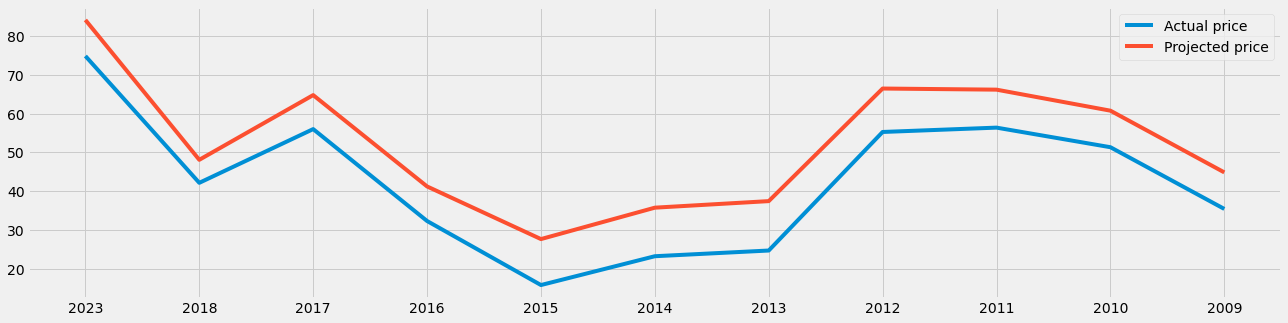

In [8]:
Price_analysis.show_plot()

In [9]:
Price_analysis.Value_analysis()

,2023,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009
date,2023-03-18,2018-12-31,2017-12-31,2016-12-31,2015-12-31,2014-12-31,2013-12-31,2012-12-31,2011-12-31,2010-12-31,2009-12-31
Stock Price,74.84,42.15,56,32.31,15.8,23.23,24.7,55.26,56.38,51.33,35.42
DCF,84.135781,48.086554,64.765151,41.220419,27.648749,35.745072,37.435063,66.456205,66.168821,60.748892,44.840349


In [10]:
Price_analysis.balance_sheet()

,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,...,2003,2002,2001,2000,1999,1998,1997,1996,1995,1994
reportedCurrency,USD,USD,USD,USD,USD,USD,USD,USD,USD,USD,...,USD,USD,USD,USD,USD,USD,USD,USD,USD,USD
cik,None,0000909037,0000909037,0000909037,0000909037,0000909037,0000909037,0000909037,0000909037,0000909037,...,0000909037,0000909037,0000909037,0000909037,0000909037,0000909037,0000909037,0000909037,0000909037,0000909037
fillingDate,2022-12-31,2021-12-31,2020-12-31,2019-12-31,2018-12-31,2017-12-31,2016-12-31,2015-12-31,2014-12-31,2013-12-31,...,2003-12-31,2002-12-31,2001-12-31,2000-12-31,1999-12-31,1998-12-31,1997-12-31,1996-12-31,1995-12-31,1994-12-31
acceptedDate,2022-12-30 19:00:00,2021-12-30 19:00:00,2020-12-30 19:00:00,2019-12-30 19:00:00,2018-12-30 19:00:00,2017-12-30 19:00:00,2016-12-30 19:00:00,2015-12-30 19:00:00,2014-12-30 19:00:00,2013-12-30 19:00:00,...,2003-12-30 19:00:00,2002-12-30 19:00:00,2001-12-30 19:00:00,2000-12-30 19:00:00,1999-12-30 19:00:00,1998-12-30 19:00:00,1997-12-30 19:00:00,1996-12-30 19:00:00,1995-12-30 19:00:00,1994-12-30 19:00:00
calendarYear,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,...,2003,2002,2001,2000,1999,1998,1997,1996,1995,1994
period,FY,FY,FY,FY,FY,FY,FY,FY,FY,FY,...,FY,FY,FY,FY,FY,FY,FY,FY,FY,FY
netIncome,0,0,0,0,0,0,1874202000,0,0,0,...,46753000,40202000,30102000,27104000,48075000,67200000,62300000,70200000,40700000,23300000
depreciationAndAmortization,0,0,0,0,0,0,0,0,0,0,...,62790000,62487000,63727000,62258000,58969000,53800000,39200000,30700000,22200000,18600000
deferredIncomeTax,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3900000,1500000
stockBasedCompensation,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
Price_analysis.buy_or_sell(ticker)

Buy
Buy between 72.62000274658203 and 78.91500091552734


(None, None)

In [12]:
hist_data=get_historical_data(ticker)
hist_data

,Close,Open,High,Volume
Date,,,,
2022-03-18 00:00:00-04:00,71.119865,69.092611,71.184369,1384400
2022-03-21 00:00:00-04:00,74.077812,71.700391,75.008509,1835800
2022-03-22 00:00:00-04:00,73.865883,74.732070,75.533760,1415100
2022-03-23 00:00:00-04:00,73.764511,73.801364,74.639915,1498600
2022-03-24 00:00:00-04:00,77.256920,73.276124,77.468863,1491600
...,...,...,...,...
2023-03-13 00:00:00-04:00,77.750000,77.000000,79.129997,1402300
2023-03-14 00:00:00-04:00,78.849998,79.680000,80.290001,2934200
2023-03-15 00:00:00-04:00,72.620003,75.510002,76.360001,2824800


In [13]:
hist_data_macd = get_macd(hist_data['Close'], 26, 12, 9)
hist_data_macd.tail()

,macd,signal,hist
Date,,,
2023-03-13 00:00:00-04:00,-2.639274,-1.474036,-1.165238
2023-03-14 00:00:00-04:00,-2.854342,-1.750097,-1.104245
2023-03-15 00:00:00-04:00,-3.487294,-2.097537,-1.389757
2023-03-16 00:00:00-04:00,-3.876447,-2.453319,-1.423128
2023-03-17 00:00:00-04:00,-4.027077,-2.768070,-1.259007


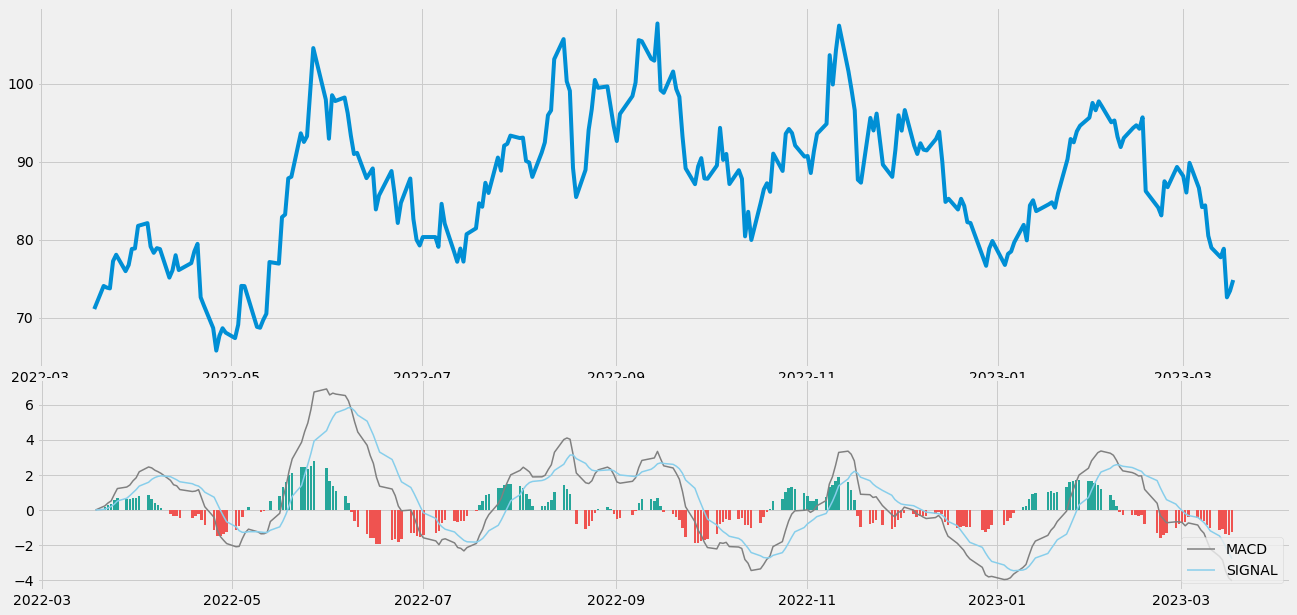

In [14]:
plot_macd(hist_data['Close'], hist_data_macd['macd'], hist_data_macd['signal'], hist_data_macd['hist'])

In [15]:
def implement_macd_strategy(prices, data):    
    buy_price = []
    sell_price = []
    macd_signal = []
    signal = 0

    for i in range(len(data)):
        if data['macd'][i] > data['signal'][i]:
            if signal != 1:
                buy_price.append(prices[i])
                sell_price.append(np.nan)
                signal = 1
                macd_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                macd_signal.append(0)
        elif data['macd'][i] < data['signal'][i]:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(prices[i])
                signal = -1
                macd_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                macd_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            macd_signal.append(0)
            
    return buy_price, sell_price, macd_signal

In [16]:
buy_price, sell_price, macd_signal = implement_macd_strategy(hist_data['Close'], hist_data_macd)

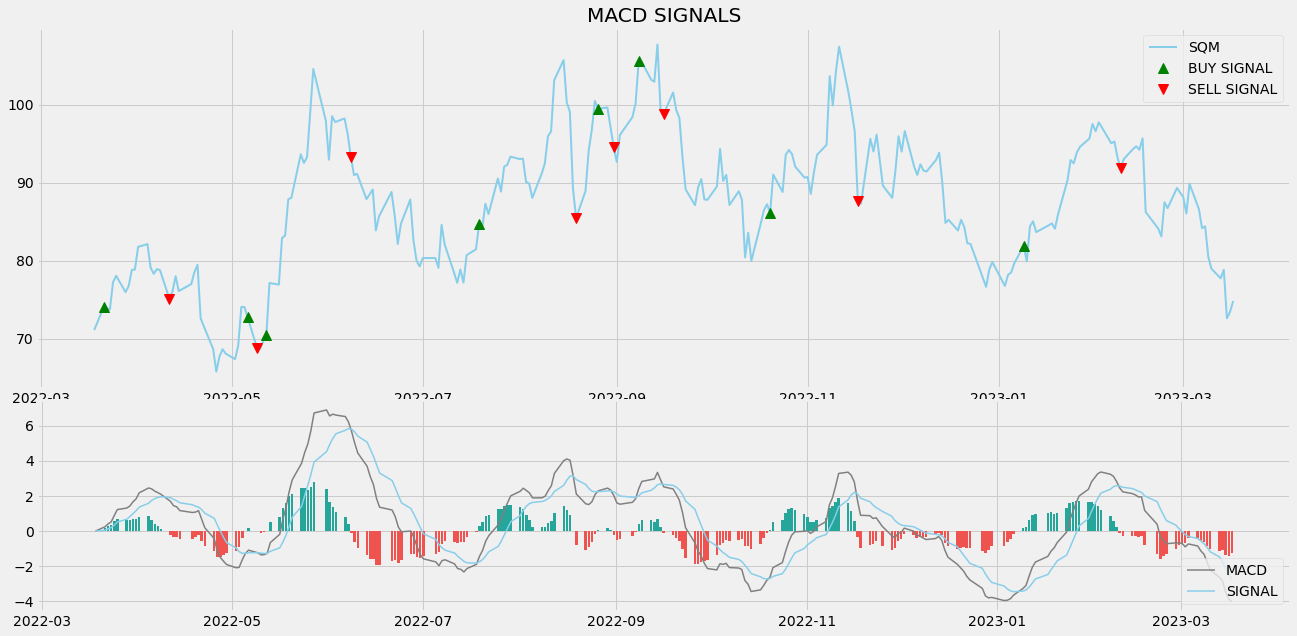

In [17]:
ax1 = plt.subplot2grid((8,1), (0,0), rowspan = 5, colspan = 1)
ax2 = plt.subplot2grid((8,1), (5,0), rowspan = 3, colspan = 1)

ax1.plot(hist_data['Close'], color = 'skyblue', linewidth = 2, label = ticker)
ax1.plot(hist_data.index, buy_price, marker = '^', color = 'green', markersize = 10, label = 'BUY SIGNAL', linewidth = 0)
ax1.plot(hist_data.index, sell_price, marker = 'v', color = 'r', markersize = 10, label = 'SELL SIGNAL', linewidth = 0)
ax1.legend()
ax1.set_title('MACD SIGNALS')
ax2.plot(hist_data_macd['macd'], color = 'grey', linewidth = 1.5, label = 'MACD')
ax2.plot(hist_data_macd['signal'], color = 'skyblue', linewidth = 1.5, label = 'SIGNAL')

for i in range(len(hist_data_macd)):
    if str(hist_data_macd['hist'][i])[0] == '-':
        ax2.bar(hist_data_macd.index[i], hist_data_macd['hist'][i], color = '#ef5350')
    else:
        ax2.bar(hist_data_macd.index[i], hist_data_macd['hist'][i], color = '#26a69a')
        
plt.legend(loc = 'lower right')
plt.show()

In [18]:
position = []
for i in range(len(macd_signal)):
    if macd_signal[i] > 1:
        position.append(0)
    else:
        position.append(1)
        
for i in range(len(hist_data['Close'])):
    if macd_signal[i] == 1:
        position[i] = 1
    elif macd_signal[i] == -1:
        position[i] = 0
    else:
        position[i] = position[i-1]
        
macd = hist_data_macd['macd']
signal = hist_data_macd['signal']
close_price = hist_data['Close']
macd_signal = pd.DataFrame(macd_signal).rename(columns = {0:'macd_signal'}).set_index(hist_data.index)
position = pd.DataFrame(position).rename(columns = {0:'macd_position'}).set_index(hist_data.index)

frames = [close_price, macd, signal, macd_signal, position]
strategy = pd.concat(frames, join = 'inner', axis = 1)

strategy

,Close,macd,signal,macd_signal,macd_position
Date,,,,,
2022-03-18 00:00:00-04:00,71.119865,0.000000,0.000000,0,1
2022-03-21 00:00:00-04:00,74.077812,0.235962,0.047192,1,1
2022-03-22 00:00:00-04:00,73.865883,0.401237,0.118001,0,1
2022-03-23 00:00:00-04:00,73.764511,0.518067,0.198014,0,1
2022-03-24 00:00:00-04:00,77.256920,0.882293,0.334870,0,1
...,...,...,...,...,...
2023-03-13 00:00:00-04:00,77.750000,-2.639274,-1.474036,0,0
2023-03-14 00:00:00-04:00,78.849998,-2.854342,-1.750097,0,0
2023-03-15 00:00:00-04:00,72.620003,-3.487294,-2.097537,0,0
